In [16]:
from scipy.integrate import quad,quadrature,nquad
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#nu=0.01/np.pi
nu=0.001

In [13]:
# scipy quad integrates with respect to the FIRST variable
# test with integral of sin(x-y) from 0 to pi/2
"""
def sin(x,y):
    return np.sin(x-y)

def int_sin(y):
    return quad(sin, 0, np.pi/2, args=(y))[0]
"""
#int_sin(0.3)
# this gives 0.6598, which is correct

'\ndef sin(x,y):\n    return np.sin(x-y)\n\ndef int_sin(y):\n    return quad(sin, 0, np.pi/2, args=(y))[0]\n'

In [34]:
# Now we do Burgers equation
# we always integrate over y

# First do denominator

def ker(y,t):
    return np.exp(- y*y / (4*nu*t))

def f(y,x,t):
    return np.exp(-np.cos(np.pi*(x-y))/(2*np.pi*nu))

def integrand_d(y,x,t):
    return f(y,x,t)*ker(y,t)

def denominator(x,t):
    return quad(integrand_d, -np.inf, np.inf, args=(x,t),limit=100)[0]
    #return quad(integrand_d, -1000., 1000., args=(x,t),limit=100)[0]
    #return quadrature(integrand_d, -10., 10., args=(x,t))[0]
# Now the numerator

def sin(y,x):
    return np.sin(np.pi*(x-y))

def integrand_n(y,x,t):
    return sin(y,x)*f(y,x,t)*ker(y,t)

def numerator(x,t):
    return quad(integrand_n, -np.inf, np.inf, args=(x,t),limit=100)[0]
    #return quad(integrand_n, -1000., 1000., args=(x,t),limit=100)[0]
    #return quadrature(integrand_n, -10., 10., args=(x,t))[0]


def u(x,t):
    return -numerator(x,t)/denominator(x,t)
    

/var/folders/58/3s7j46gx4t50mdq4tzm0t9gw0000gn/T/ipykernel_6668/1887603160.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand_n, -np.inf, np.inf, args=(x,t),limit=100)[0]
/var/folders/58/3s7j46gx4t50mdq4tzm0t9gw0000gn/T/ipykernel_6668/1887603160.py:28: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand_n, -np.inf, np.inf, args=(x,t),limit=100)[0]


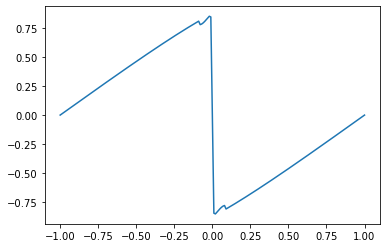

In [36]:
t=0.75
u_list=[]
for x in np.arange(-1,1.01,0.01):
    u_list.append(u(x,t))

plt.plot(np.arange(-1,1.01,0.01), u_list)
